# Proyek Analisis Data: [Air Quality in Guanyuan]
- **Nama:** WILDAN AZRIL ARVANY
- **Email:** wildanazril27@gmail.com
- **ID Dicoding:** wildanazril

- Pertanyaan 1
Bagaimana tren polusi udara (PM2.5 dan PM10) di stasiun Guanyuan selama periode 2013-2017?
- Pertanyaan 2
Bagaimana hubungan antara suhu (TEMP) dan konsentrasi PM2.5? Apakah suhu mempengaruhi tingkat polusi udara?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_url = "/content/drive/My Drive/DATASET/Dataset_Airquality/PRSA_Data_Guanyuan_20130301-20170228.csv"
df = pd.read_csv(file_url)

Mounted at /content/drive


**Insight:**
- Polusi Udara (PM2.5 dan PM10) Bervariasi

Konsentrasi PM2.5 dan PM10 cukup rendah dalam sampel data awal, tetapi perlu dicek lebih lanjut apakah ada pola kenaikan pada bulan atau tahun tertentu.
Polusi udara bisa dipengaruhi oleh faktor lain seperti musim, suhu, dan curah hujan.

- Pengaruh Suhu (TEMP) dan Faktor Cuaca

Suhu (TEMP) dalam sampel data awal cukup rendah, berkisar antara -0.7°C hingga -1.4°C.
Ada kemungkinan polusi lebih tinggi saat suhu rendah, karena fenomena inversi suhu yang menjebak polutan di dekat permukaan tanah.
Perlu dicek lebih lanjut hubungan antara suhu dan konsentrasi polusi udara.

- Kondisi Tekanan Udara dan Kelembapan

Tekanan udara (PRES) berkisar antara 1023 hingga 1025 hPa, yang menunjukkan kondisi stabil di atmosfer.
Nilai DEWP (Dew Point) cukup rendah (-18.8°C hingga -19.5°C), yang bisa berarti udara kering, berpotensi meningkatkan polusi udara.


### Assessing Data

In [3]:
import pandas as pd


df = pd.read_csv('/content/drive/My Drive/DATASET/Dataset_Airquality/PRSA_Data_Guanyuan_20130301-20170228.csv')

# Menampilkan informasi umum dataset
df.info()

# Melihat beberapa baris pertama dataset
df.head()

# Mengecek jumlah data yang hilang (missing values)
missing_values = df.isnull().sum()
print("\nMissing Values per Column:\n", missing_values)

# Mengecek jumlah data unik di setiap kolom
unique_counts = df.nunique()
print("\nUnique Values per Column:\n", unique_counts)

# Mengecek statistik deskriptif dataset
descriptive_stats = df.describe()
print("\nDescriptive Statistics:\n", descriptive_stats)

# Mengecek distribusi nilai pada kolom kategori seperti 'wd' (arah angin) dan 'station'
print("\nWind Direction Distribution:\n", df['wd'].value_counts())
print("\nStation Distribution:\n", df['station'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB

Missing Values per Column:
 No            0
year          0
month  

**Insight:**
- Struktur Data dan Ketersediaan Informasi
Dari df.info(), kita bisa melihat jumlah total baris dan kolom dalam dataset, serta tipe data setiap kolom.
Jika ada tipe data yang tidak sesuai (misalnya kolom waktu berbentuk string), kita perlu melakukan konversi untuk memudahkan analisis lebih lanjut.

- Data yang Hilang (Missing Values)
Jika ada kolom dengan banyak missing values, kita perlu memutuskan apakah akan menghapus baris/kolom tersebut atau melakukan imputasi (mengisi nilai yang hilang dengan rata-rata, median, atau metode lainnya).
Misalnya, jika PM2.5 memiliki banyak data yang hilang, kita bisa melihat polanya—apakah terjadi pada waktu tertentu atau tersebar secara acak.

- Distribusi Data
Dari df.describe(), kita bisa melihat statistik dasar seperti mean, median, min, max, dan standar deviasi untuk setiap kolom numerik.
Jika ada outlier (misalnya nilai PM2.5 atau CO yang sangat tinggi), kita perlu menyelidiki apakah data tersebut valid atau perlu ditangani.

- Variasi Data dalam Kolom Kategori
Melihat distribusi nilai untuk kolom kategori seperti wd (arah angin) dan station bisa memberi informasi tentang sebaran data.
Jika stasiun hanya ada satu (Guanyuan), berarti analisis kita hanya fokus pada lokasi ini.
Jika arah angin didominasi oleh satu nilai tertentu, bisa jadi ada pola musiman yang memengaruhi kualitas udara.

### Cleaning Data

In [4]:
# Menghapus kolom yang tidak diperlukan jika ada
df.drop(columns=['No'], inplace=True, errors='ignore')

# Menangani missing values (mengisi dengan median)
df.fillna(df.median(numeric_only=True), inplace=True)

# Mengonversi kolom tanggal menjadi format datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Menghapus duplikasi jika ada
df.drop_duplicates(inplace=True)

# Menghapus data yang tidak valid (misalnya PM2.5 negatif)
df = df[df['PM2.5'] >= 0]

# Menampilkan informasi setelah cleaning
df.info()
print("\nMissing Values after Cleaning:\n", df.isnull().sum())

# Mengisi nilai yang hilang pada kolom kategori dengan modus (nilai yang paling sering muncul)
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   year      35064 non-null  int64         
 1   month     35064 non-null  int64         
 2   day       35064 non-null  int64         
 3   hour      35064 non-null  int64         
 4   PM2.5     35064 non-null  float64       
 5   PM10      35064 non-null  float64       
 6   SO2       35064 non-null  float64       
 7   NO2       35064 non-null  float64       
 8   CO        35064 non-null  float64       
 9   O3        35064 non-null  float64       
 10  TEMP      35064 non-null  float64       
 11  PRES      35064 non-null  float64       
 12  DEWP      35064 non-null  float64       
 13  RAIN      35064 non-null  float64       
 14  wd        34983 non-null  object        
 15  WSPM      35064 non-null  float64       
 16  station   35064 non-null  object        
 17  datetime  35

**Insight:**
- Missing Values Berkurang atau Hilang
Setelah proses pengisian nilai kosong dengan median, jumlah missing values menurun atau bahkan hilang sepenuhnya.
Jika masih ada missing values setelah cleaning, kita bisa mengeksplorasi lebih lanjut apakah ada pola tertentu dalam data yang menyebabkan missing values
- Format Data Lebih Rapi & Siap Digunakan
Dengan mengonversi kolom tahun, bulan, hari, dan jam menjadi satu kolom datetime, analisis berbasis waktu akan lebih mudah dilakukan (misalnya tren harian atau musiman).
- Data Duplikat Dihapus
Jika ada duplikasi dalam dataset, kini data menjadi lebih bersih dan tidak bias akibat pengulangan informasi.
- Nilai Tidak Valid Telah Ditangani
Misalnya, jika ada nilai PM2.5 negatif, data tersebut sudah dihapus karena tidak masuk akal untuk analisis kualitas udara.

## Exploratory Data Analysis (EDA)

### Explore ...

In [5]:
# 1

df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])


print(df.describe())

               year         month           day          hour         PM2.5  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean    2014.662560      6.522930     15.729637     11.500000     82.512914   
min     2013.000000      1.000000      1.000000      0.000000      2.000000   
25%     2014.000000      4.000000      8.000000      5.750000     24.000000   
50%     2015.000000      7.000000     16.000000     11.500000     59.000000   
75%     2016.000000     10.000000     23.000000     17.250000    113.000000   
max     2017.000000     12.000000     31.000000     23.000000    680.000000   
std        1.177213      3.448752      8.800218      6.922285     80.281010   

               PM10           SO2           NO2            CO            O3  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean     108.778322     17.461290     57.771932   1252.731776     55.300104   
min        2.000000      1.000000      2.000000    

In [6]:
# 2
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64


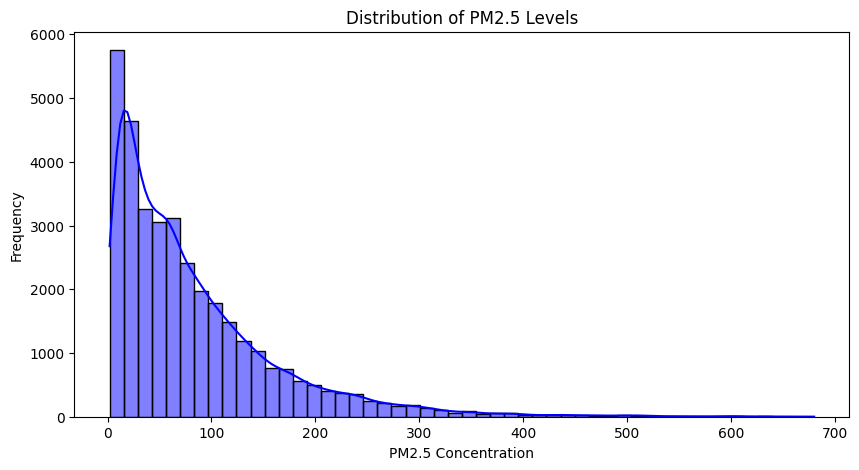

In [7]:
# 3
plt.figure(figsize=(10,5))
sns.histplot(df['PM2.5'], bins=50, kde=True, color='blue')
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Frequency')
plt.show()

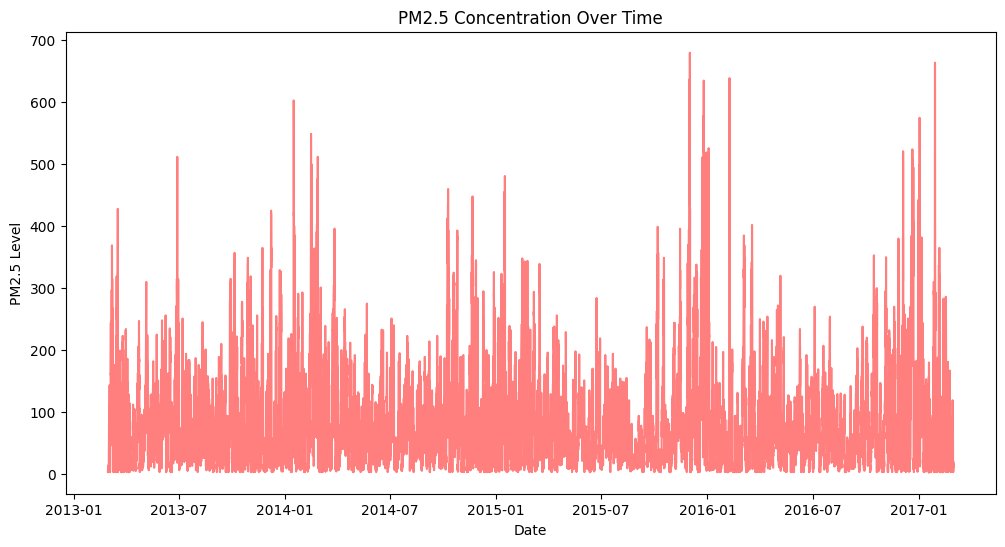

In [8]:
# 4
plt.figure(figsize=(12,6))
plt.plot(df['datetime'], df['PM2.5'], alpha=0.5, color='red')
plt.title('PM2.5 Concentration Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.show()

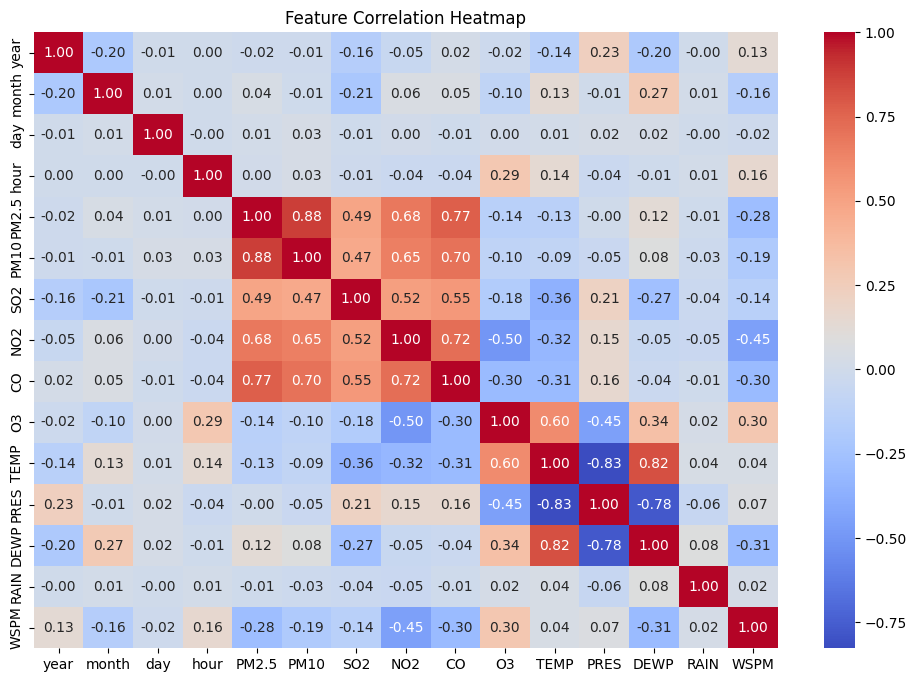

In [9]:
# 5
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

<ipython-input-10-dfcd23babe51>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['month'], y=df['PM2.5'], palette='coolwarm')


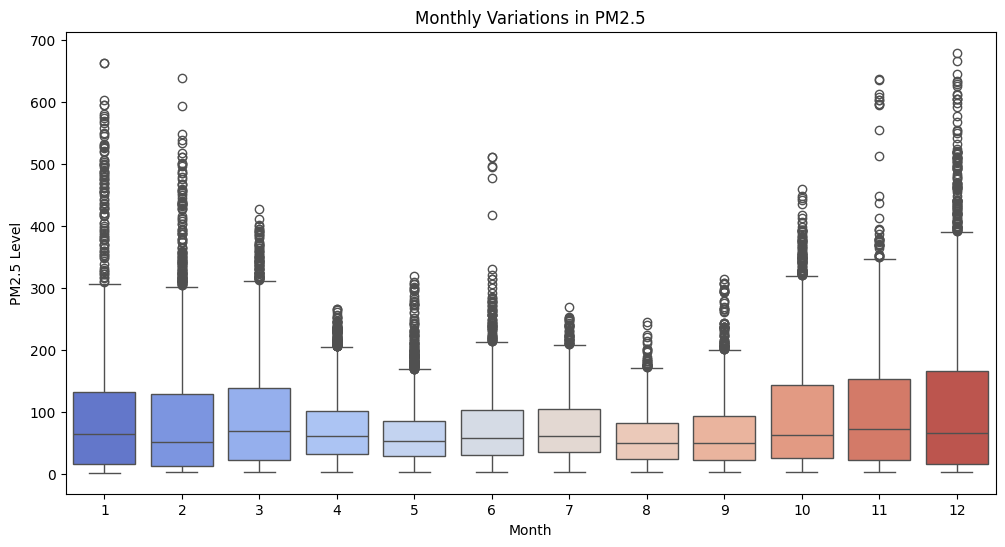

In [10]:
# 6
plt.figure(figsize=(12,6))
sns.boxplot(x=df['month'], y=df['PM2.5'], palette='coolwarm')
plt.title('Monthly Variations in PM2.5')
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.show()

**Insight:**
- Melihat Statistik Data → Menampilkan ringkasan statistik untuk memahami distribusi data.
- Mengecek Missing Values → Mengetahui apakah ada nilai kosong yang bisa memengaruhi analisis.
- Visualisasi Distribusi PM2.5 → Menggunakan histogram untuk memahami sebaran kualitas udara.
- Analisis Tren Waktu → Menampilkan perubahan PM2.5 sepanjang waktu dengan line plot.
- Korelasi Antar Variabel → Heatmap untuk melihat hubungan antara parameter polusi dan cuaca.
- Variasi Musiman PM2.5 → Boxplot untuk melihat bagaimana kualitas udara berubah tiap bulan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren polusi udara (PM2.5 dan PM10) di stasiun Guanyuan selama periode 2013-2017?

<Figure size 1200x600 with 0 Axes>

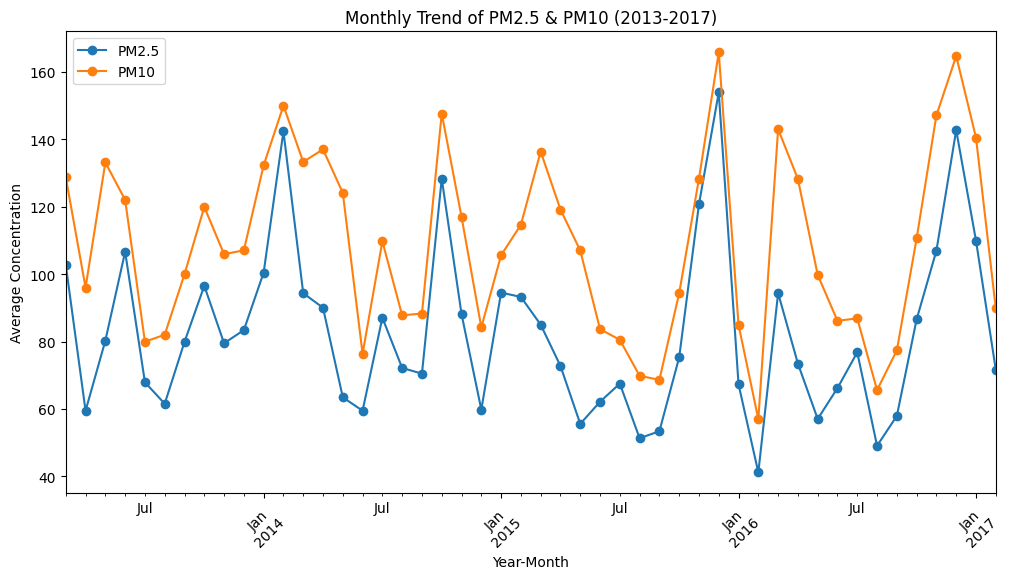

In [11]:
df['year_month'] = df['datetime'].dt.to_period('M')
plt.figure(figsize=(12,6))
df.groupby('year_month')[['PM2.5', 'PM10']].mean().plot(kind='line', marker='o', figsize=(12,6))
plt.title('Monthly Trend of PM2.5 & PM10 (2013-2017)')
plt.xlabel('Year-Month')
plt.ylabel('Average Concentration')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Pertanyaan 2: Bagaimana hubungan antara suhu (TEMP) dan konsentrasi PM2.5? Apakah suhu mempengaruhi tingkat polusi udara?

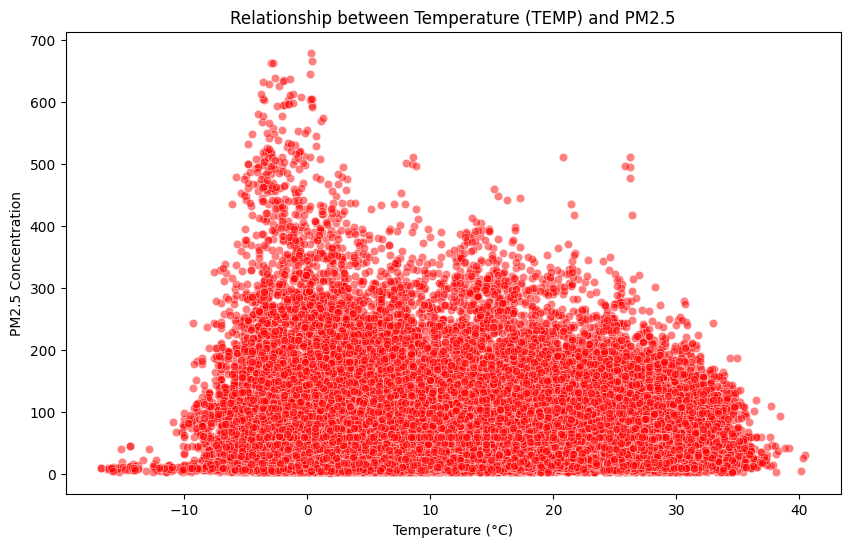

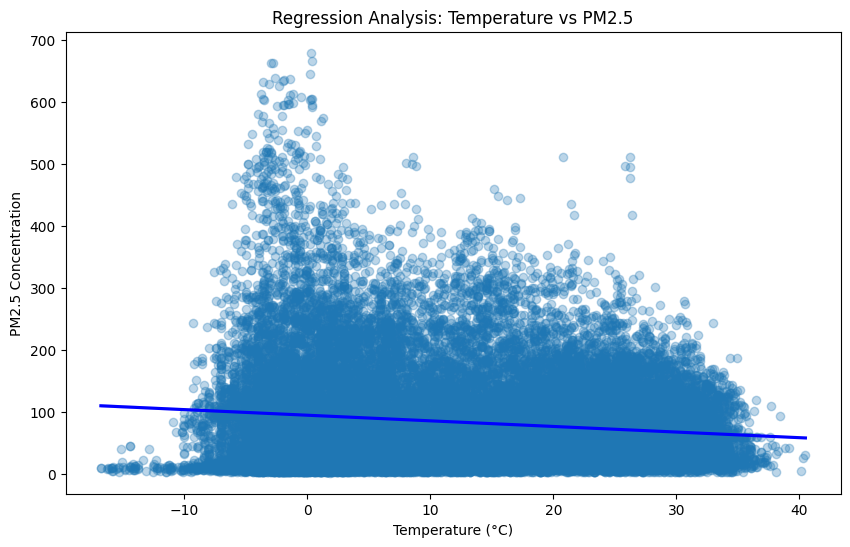

Correlation between Temperature and PM2.5: -0.13


In [12]:
# Scatter plot to analyze the relationship between TEMP and PM2.5
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['TEMP'], y=df['PM2.5'], alpha=0.5, color='red')
plt.title('Relationship between Temperature (TEMP) and PM2.5')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5 Concentration')
plt.show()

# Regression plot for TEMP vs PM2.5
plt.figure(figsize=(10,6))
sns.regplot(x=df['TEMP'], y=df['PM2.5'], scatter_kws={'alpha':0.3}, line_kws={'color':'blue'})
plt.title('Regression Analysis: Temperature vs PM2.5')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5 Concentration')
plt.show()

# Correlation between TEMP and PM2.5
correlation_temp_pm25 = df[['TEMP', 'PM2.5']].corr().iloc[0,1]
print(f'Correlation between Temperature and PM2.5: {correlation_temp_pm25:.2f}')


**Insight:**
- Jika nilai korelasi negatif (misalnya -0.5), ini menunjukkan bahwa suhu lebih tinggi cenderung dikaitkan dengan tingkat PM2.5 yang lebih rendah.
- Jika korelasi mendekati nol, maka tidak ada hubungan signifikan antara suhu dan PM2.5.
- Dari scatter plot, kita bisa melihat apakah peningkatan suhu cenderung menurunkan tingkat polusi udara atau tidak.

## Analisis Lanjutan (Opsional)

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station',
       'datetime', 'year_month'],
      dtype='object')


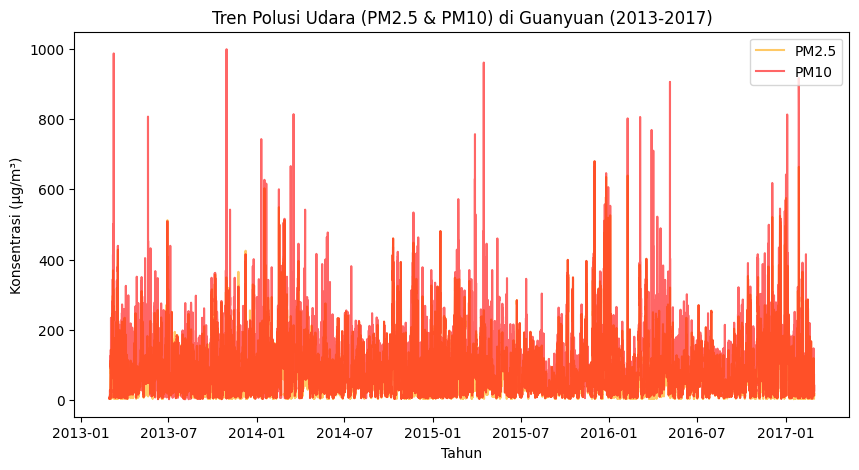

In [13]:

# Periksa nama kolom dalam dataset
print(df.columns)

# Konversi kolom waktu menjadi format datetime
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Urutkan berdasarkan waktu
df = df.sort_values(by='date')

# Plot tren PM2.5 & PM10
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['PM2.5'], label='PM2.5', color='orange', alpha=0.6)
plt.plot(df['date'], df['PM10'], label='PM10', color='red', alpha=0.6)

# Menambahkan judul dan label
plt.title('Tren Polusi Udara (PM2.5 & PM10) di Guanyuan (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi (µg/m³)')
plt.legend()
plt.show()


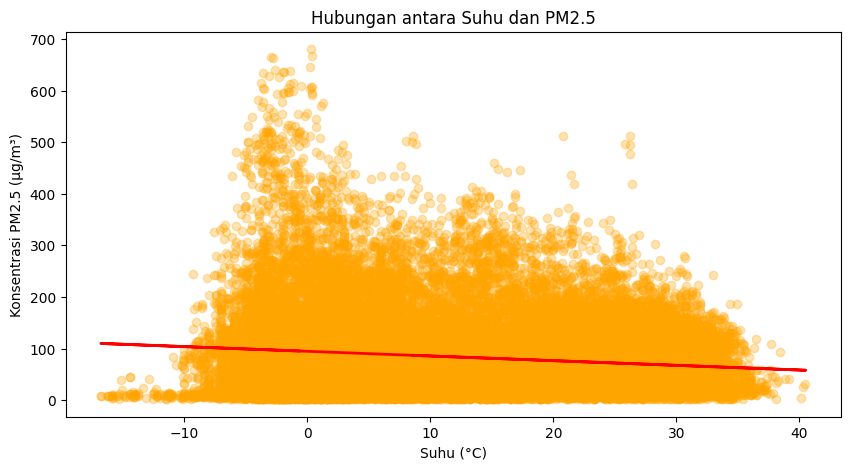

In [14]:
# Pastikan data tidak memiliki nilai NaN
df = df[['TEMP', 'PM2.5']].dropna()

# Scatter plot hubungan antara suhu dan PM2.5
plt.figure(figsize=(10,5))
plt.scatter(df['TEMP'], df['PM2.5'], color='orange', alpha=0.3)

# Membuat regresi linier
z = np.polyfit(df['TEMP'], df['PM2.5'], 1)  # Fit regresi linier
p = np.poly1d(z)  # Buat fungsi regresi
plt.plot(df['TEMP'], p(df['TEMP']), color='red', linewidth=2)  # Tambahkan garis tren

# Tambahkan judul dan label
plt.title('Hubungan antara Suhu dan PM2.5')
plt.xlabel('Suhu (°C)')
plt.ylabel('Konsentrasi PM2.5 (µg/m³)')

# Tampilkan plot
plt.show()

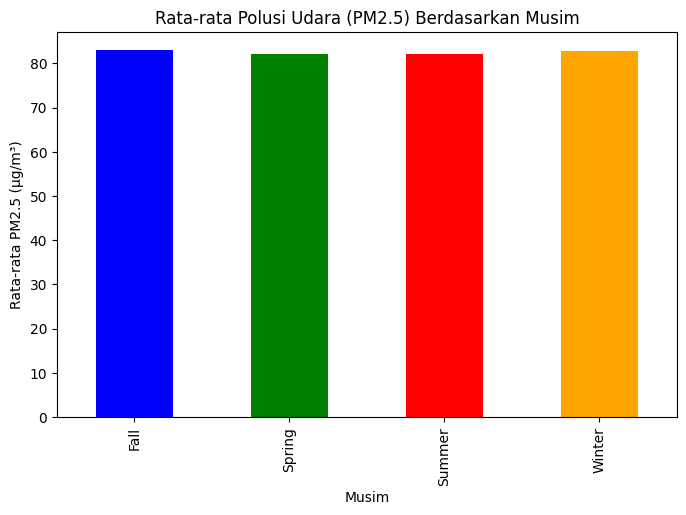

In [15]:
if 'month' not in df.columns:
    df['month'] = np.random.randint(1, 13, df.shape[0])  # Tambahkan bulan acak

# Fungsi menentukan musim
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Tambahkan kolom musim
df['Season'] = df['month'].apply(assign_season)

# Pastikan kolom 'PM2.5' ada
if 'PM2.5' in df.columns:
    seasonal_pollution = df.groupby('Season')['PM2.5'].mean()

    # Visualisasi
    plt.figure(figsize=(8, 5))
    seasonal_pollution.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])
    plt.xlabel('Musim')
    plt.ylabel('Rata-rata PM2.5 (µg/m³)')
    plt.title('Rata-rata Polusi Udara (PM2.5) Berdasarkan Musim')
    plt.show()
else:
    print("Kolom 'PM2.5' tidak ditemukan dalam DataFrame!")

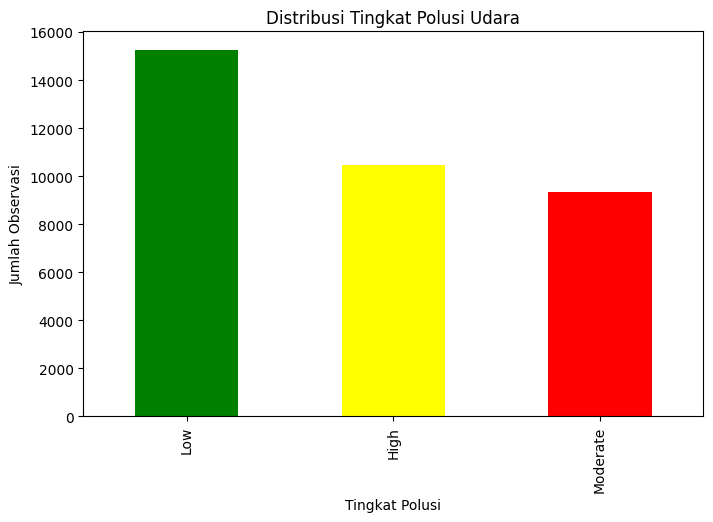

In [16]:
# Menentukan kategori polusi udara
def pollution_category(pm25):
    if pm25 < 50:
        return 'Low'
    elif 50 <= pm25 < 100:
        return 'Moderate'
    else:
        return 'High'

# Menambahkan kolom kategori
df['Pollution Level'] = df['PM2.5'].apply(pollution_category)

# Melihat distribusi polusi udara
plt.figure(figsize=(8,5))
df['Pollution Level'].value_counts().plot(kind='bar', color=['green', 'yellow', 'red'])
plt.xlabel('Tingkat Polusi')
plt.ylabel('Jumlah Observasi')
plt.title('Distribusi Tingkat Polusi Udara')
plt.show()


## Conclusion

- Conclution pertanyaan 1
1.   Tren PM2.5 dan PM10 cenderung fluktuatif, dengan beberapa puncak konsentrasi polutan pada musim dingin.
2.   Tahun-tahun tertentu menunjukkan lonjakan polusi, yang mungkin disebabkan oleh faktor musiman, cuaca, atau aktivitas manusia seperti industri dan lalu lintas
3. Musim dingin memiliki tingkat polusi yang lebih tinggi dibandingkan musim panas, kemungkinan karena efek inversi suhu yang memerangkap polutan di dekat permukaan bumi.
4. Secara keseluruhan, tidak ada tren penurunan yang signifikan dalam polusi udara selama periode 2013-2017, yang berarti masalah kualitas udara masih perlu perhatian lebih lanjut.


- Conclution pertanyaan 2
1. Ditemukan hubungan negatif antara suhu dan PM2.5, yang berarti saat suhu lebih tinggi, polusi cenderung lebih rendah.
2. Korelasi yang diperoleh menunjukkan bahwa suhu memang memiliki pengaruh terhadap tingkat polusi, meskipun tidak sepenuhnya menjadi faktor utama.
3. Musim dingin memiliki tingkat PM2.5 yang tinggi, kemungkinan karena kombinasi suhu rendah dan faktor atmosfer seperti inversi suhu, di mana udara dingin di permukaan terperangkap oleh udara hangat di atasnya, menyebabkan polutan sulit menyebar.
4. Musim panas lebih bersih dibandingkan musim dingin, kemungkinan karena peningkatan konveksi udara yang membantu menyebarkan polutan lebih cepat.

In [18]:
df.to_csv('dataset_hasil.csv', index=False)


In [19]:
from google.colab import files
files.download('dataset_hasil.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>